## **Notebook 01 — Exploratory Data Analysis & RFM Feature Engineering**
________
### ***1. Introduction***
### ***In this notebook, we perform initial data loading, cleaning, preprocessing, and RFM feature construction for the Online Retail dataset. This section prepares the dataset for the clustering phase in later notebooks.***
________
### ***2. Import Required Libraries***
### ***This section loads all Python libraries needed for data manipulation, visualization, and feature engineering.***

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

________
### ***3. Load Dataset***
### ***We load the raw Online Retail data from the CSV file into a Pandas DataFrame and inspect its initial structure.***

In [30]:
df = pd.read_csv("Online Retail.csv")

________
### ***4. Initial Data Inspection***
### ***Here we examine the dataset schema, descriptive statistics, shape, columns, and missing values.***
### ***Subsections:***
### ***4.1 Print the Dataset***

In [31]:
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

             InvoiceDate  UnitPrice  CustomerID         Country  
0       1

### ***4.2 Descriptive Statistics***

In [32]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### ***4.3 Dataset Info and Shape***

In [33]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


(541909, 8)

### ***4.4 Column List***

In [34]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

### ***4.5 Missing Value Analysis***

In [35]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

________
### ***5. Data Cleaning***
### ***We remove missing CustomerID and Description values, and filter out invalid Quantity and UnitPrice entries.***
### ***Subsections:***
### ***5.1 Drop Null CustomerID and Description***

In [36]:
df = df.dropna(subset=["CustomerID"])
df = df.dropna(subset=["Description"])

### ***5.2 Re-check Missing Values***

In [37]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### ***5.3 Remove Negative or Zero Quantity/Price***

In [38]:
df = df[df["Quantity"] > 0]
df = df[df["UnitPrice"] > 0]

### ***5.4 Preview Cleaned Data***

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


________
### ***6. Exploratory Analysis of Key Variables***
### ***Visual and statistical exploration of Quantity and UnitPrice distributions.***
### ***Subsections:***
### ***6.1 Summary Statistics for Quantity***

In [40]:
df["Quantity"].describe()

count    397884.000000
mean         12.988238
std         179.331775
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

### ***6.2 Quantity Value Counts***

In [41]:
df["Quantity"].value_counts().head(10)

Quantity
1     73301
12    60031
2     57999
6     37688
4     32180
3     26948
24    23748
10    21212
8     11644
5      8148
Name: count, dtype: int64

### ***6.3 Histogram of log(Quantity)***

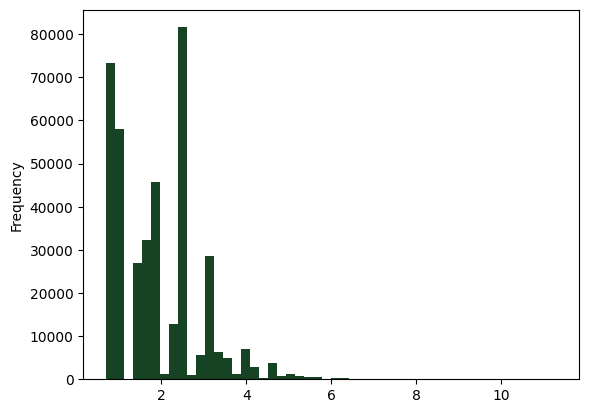

In [42]:
np.log1p(df["Quantity"]).plot(kind="hist", bins=50, color="#164323")
plt.show()

### ***6.4 Histogram of log(UnitPrice)***

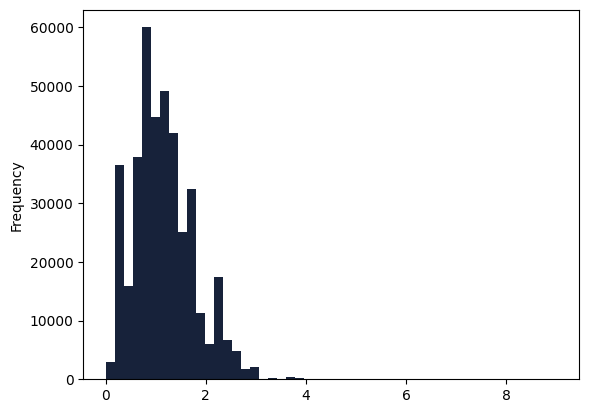

In [43]:
np.log1p(df["UnitPrice"]).plot(kind="hist", bins=50, color="#17223A")
plt.show()

________
### ***7. Invoice-Level Feature Construction***
### ***We calculate the total invoice amount as `InvoiceTotal = Quantity × UnitPrice`.***
### ***Subsections:***
### ***7.1 Create InvoiceTotal***

In [44]:
df["InvoiceTotal"] = df["Quantity"] * df["UnitPrice"]
df["InvoiceTotal"].head()

0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: InvoiceTotal, dtype: float64

### ***7.2 Describe InvoiceTotal***

In [45]:
df["InvoiceTotal"].describe()

count    397884.000000
mean         22.397000
std         309.071041
min           0.001000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: InvoiceTotal, dtype: float64

________
### ***8. Date Processing***
### ***Convert InvoiceDate to datetime and review date range.***
### ***Subsections:***
### ***8.1 Convert InvoiceDate to Datetime***

In [46]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].dtype

dtype('<M8[ns]')

### ***8.2 Max/Min Invoice Date***

In [47]:
print(f"maximum of invoice date: {df["InvoiceDate"].max()} \nminimum of invoice date: {df["InvoiceDate"].min()}")

maximum of invoice date: 2011-12-09 12:50:00 
minimum of invoice date: 2010-12-01 08:26:00


### ***8.3 Customer-Level Last Purchase Date***

In [48]:
last_purchase = df.groupby("CustomerID")["InvoiceDate"].max()

________
### ***9. RFM Feature Engineering***
### ***We compute the Recency, Frequency, and Monetary metrics per customer.***
### ***Subsections:***
### ***9.1 Define RFM Reference Date***

In [49]:
rfm_reference_date = (df["InvoiceDate"].max()) + (pd.Timedelta(days=1))

### ***9.2 Compute Recency***

In [50]:
Recency = (rfm_reference_date - last_purchase).dt.days

### ***9.3 Compute Frequency***

In [51]:
Frequency = df.groupby("CustomerID")["InvoiceNo"].nunique()

### ***9.4 Compute Monetary***

In [52]:
Monetary = df.groupby("CustomerID")["InvoiceTotal"].sum()

### ***9.5 Assemble the Final RFM Table***

In [53]:
rfm = pd.DataFrame({
    "Recency": Recency,
    "Frequency": Frequency,
    "Monetary": Monetary
})

### ***9.6 Overview of the RFM Table***

In [54]:
rfm.head()
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


________
### ***10. Customer-Level Sanity Check***
### ***To ensure the RFM metrics were computed correctly, a small random sample of customers was inspected. This step verifies that the Recency, Frequency, and Monetary values match the transactions in the dataset.***

In [55]:
rfm.sample(5)

,Recency,Frequency,Monetary
CustomerID,,,
14520.0,2,2,270.60
12631.0,57,1,640.50
17447.0,40,2,541.53
15223.0,226,2,755.75
15364.0,96,2,913.19


________
### ***11.Conclusion***
### ***This notebook completes the data preparation stage and produces a clean RFM dataset to be used in subsequent clustering analysis.***

In [56]:
rfm.to_csv("RFM_cleaned.csv", index=True)
df.to_csv("DF_cleaned.csv", index=True)